## <font color='blue'> Problem 1: You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

### Data Ingestion: 11 marks

* 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. (4 Marks)
* 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)

### Data Preparation: 4 marks
* 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (4 Marks)

### Modeling: 22 marks
* 1.4 Apply Logistic Regression and LDA (linear discriminant analysis). (4 marks)
* 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results. (4 marks)
* 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting. (7 marks)
* 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized. (7 marks)

### Inference: 5 marks
* 1.8 Based on these predictions, what are the insights? (5 marks)

## <font color='blue'> Problem 2: In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

* President Franklin D. Roosevelt in 1941
* President John F. Kennedy in 1961
* President Richard Nixon in 1973

* (Hint: use .words(), .raw(), .sent() for extracting counts)

* 2.1 Find the number of characters, words, and sentences for the mentioned documents. – 3 Marks

* 2.2 Remove all the stopwords from all three speeches. – 3 Marks

* 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords) – 3 Marks

* 2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords) – 3 Marks [ refer to the End-to-End Case Study done in the Mentored Learning Session ]

* Code Snippet to extract the three speeches:

"
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')
"

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

# Solutions:

### 1.1) Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check, Summary stats, Skewness must be discussed.

In [2]:
# Reading the dataset.

election = pd.read_excel('D:\Study\Data Science and Machine Learning\Great_learning course\Main content\Module6 - Machine Learning\Week-3 Text Analytics\Project\Election_Data.xlsx')

#### **Data Dictionary**

1. vote: Party choice: Conservative or Labour

2. age: in years

3. economic.cond.national: Assessment of current national economic conditions, 1 to 5.

4. economic.cond.household: Assessment of current household economic conditions, 1 to 5.

5. Blair: Assessment of the Labour leader, 1 to 5.

6. Hague: Assessment of the Conservative leader, 1 to 5.

7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.

8. political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.

9. gender: female or male.


In [3]:
# Checking the top 5 rows of the data set.

election.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [4]:
# Checking the information of data types.

election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


* Inference: 
* There are 1525 rows and 10 columns.
* There are 8 columns consist of int64 data types and 2 carrying object data types.
* There is a need to drop unwanted column 'Unnamed: 0' from the dataset.

In [5]:
# Checking null 
election.isnull().any()

Unnamed: 0                 False
vote                       False
age                        False
economic.cond.national     False
economic.cond.household    False
Blair                      False
Hague                      False
Europe                     False
political.knowledge        False
gender                     False
dtype: bool

* Inference:
* There are no null values in the data set.

In [6]:
# Checking the data summary:
election.describe()

,Unnamed: 0,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,763.000000,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,440.373894,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,1.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,382.000000,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,763.000000,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,1144.000000,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,1525.000000,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


#### Inference:

* Mean age of the voters in the data set i.e. 54, suggests that the survey has been done on mature voters, however minimum and maximum age of the voters in the sample is 24 and 93. 

* The mean rating of the economic condition of the nation and household is around 3.2 out of 5 which seems quite good. Therefore, we can say that the voters are niether dissapointed nor too over-whelmed by the economic condition of the nation and household. 

* If we compare the mean assessment ratings of Blair and Hague column, we can easily conclude that the leader of the Labour party is clearly doing better with 3.33 mean ratings in comparison to the leader of the Conservative party who has got 2.74 mean rating. 

* If we look at the mean rating of the Europe column i.e. 6.72 out of 11 which indicates a minor inclination towards eurosceptic sentiment of the voters. 

* Lastly, the voters in the sample has got average political knowledge, if we look at the mean rating of 'political.knowledge' column i.e. 1.54 out of 3.

In [7]:
# Checking the skewness in the data.
election.skew()

Unnamed: 0                 0.000000
age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64

#### Inference:

* Most of the columns are slightly negative skewed among whom column 'Blair' and 'political.knowledge' show maximum negative skewness. 

* Column 'Age' and 'Hague' are the only two columns showing slighly positive skewness. 

### 1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

### Performing EDA

In [8]:
# Checking the shape of the data set.

election.shape

(1525, 10)

#### Inference:

* The data set contains '1525' rows and '10' columns. 

In [9]:
# Checking null values

election.isnull().any()

Unnamed: 0                 False
vote                       False
age                        False
economic.cond.national     False
economic.cond.household    False
Blair                      False
Hague                      False
Europe                     False
political.knowledge        False
gender                     False
dtype: bool

#### Inference:

* From the above output, we can conclude that there is no null value in the data set.

In [10]:
# Checking duplicate values.

election.duplicated().any()

False

#### Inference:

* From the above output, we can conclude that there is no duplicate values in the data set.

In [11]:
# Checking the data types.

election.dtypes

Unnamed: 0                  int64
vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

#### Inference: 

* There are two columns 'vote' and 'gender' carrying object type data sets and rest all carrying int64 type data sets. 

In [12]:
# Checking value counts of the object type columns in data set.

for columns in election.columns:
    if election[columns].dtype=='object':
        print(columns.upper(), ':',election[columns].nunique())
        print(election[columns].value_counts().sort_values())
        print('\n')

VOTE : 2
Conservative     462
Labour          1063
Name: vote, dtype: int64


GENDER : 2
male      713
female    812
Name: gender, dtype: int64




#### Inference: 

* From the above output we can make following conclusions:

* Clearly Labour Party has got majority votes i.e. '1063', its more than double in comparison to Conservative party's votes '462'. 

* If we take Gender column into cosideration, there are 713 males and 812 females in the data set.

In [13]:
# Dropping the unnecessary column 'Unnamed: 0' and 'age' from the data set.

election.drop('Unnamed: 0', axis=1, inplace= True)


### Univariate Analysis

In [14]:
# checking the number of votes to both party on the basis of gender.

gen_vote = election.groupby('gender')['vote']
gen_vote_count = gen_vote.value_counts()
gen_vote_count

gender  vote        
female  Labour          553
        Conservative    259
male    Labour          510
        Conservative    203
Name: vote, dtype: int64

#### Inference: 

* From the above output, we can clearly infer that the Labour party has got the more number of votes from both males and females. 

In [15]:
# defining function for checking statistical summary of all the numerical columns in the data set.

def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(election[column].describe())
    print('\n')

In [16]:
# Making list of all the numerical columns in the data set and calculating the number of numerical columns.

election_num = election.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(election_num.columns.values)
len(lstnumericcolumns)

7

#### Inference:  There are 7 numerical columns in the data set.

In [17]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)
    

Description of age
----------------------------------------------------------------------------
count    1525.000000
mean       54.182295
std        15.711209
min        24.000000
25%        41.000000
50%        53.000000
75%        67.000000
max        93.000000
Name: age, dtype: float64


Description of economic.cond.national
----------------------------------------------------------------------------
count    1525.000000
mean        3.245902
std         0.880969
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.national, dtype: float64


Description of economic.cond.household
----------------------------------------------------------------------------
count    1525.000000
mean        3.140328
std         0.929951
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.household, dtype: float64


Description of Blair
-------------------------

#### Inference: 

* Mean age of the voters in the data set i.e. 54, suggests that the survey has been done on mature voters, however minimum and maximum age of the voters in the sample is 24 and 93. 

* The mean rating of the economic condition of the nation and household is around 3.2 out of 5 which seems quite good. Therefore, we can say that the voters are niether dissapointed nor too over-whelmed by the economic condition of the nation and household. 

* If we compare the mean assessment ratings of Blair and Hague column, we can easily conclude that the leader of the Labour party is clearly doing better with 3.33 mean ratings in comparison to the leader of the Conservative party who has got 2.74 mean rating. 

* If we look at the mean rating of the Europe column i.e. 6.72 out of 11 which indicates a minor inclination towards eurosceptic sentiment of the voters. 

* Lastly, the voters in the sample has got average political knowledge, if we look at the mean rating of 'political.knowledge' column i.e. 1.54 out of 3.

In [18]:
# Defining function for making histogram plots of numerical variables in the data set.

def univariateAnalysis_numeric(column,nbins):
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.histplot(election[column], kde=True, color='r');
    plt.show()

Distribution of age
----------------------------------------------------------------------------


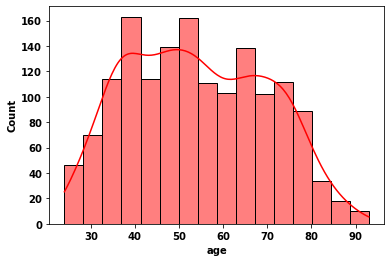

Distribution of economic.cond.national
----------------------------------------------------------------------------


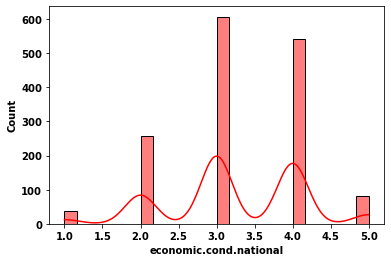

Distribution of economic.cond.household
----------------------------------------------------------------------------


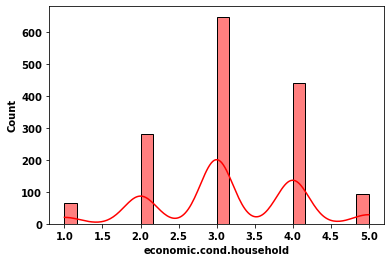

Distribution of Blair
----------------------------------------------------------------------------


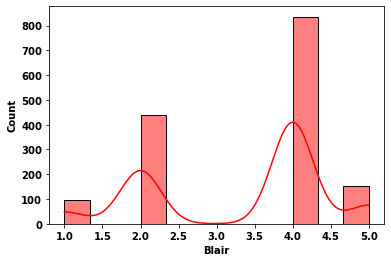

Distribution of Hague
----------------------------------------------------------------------------


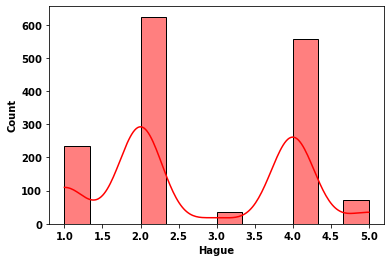

Distribution of Europe
----------------------------------------------------------------------------


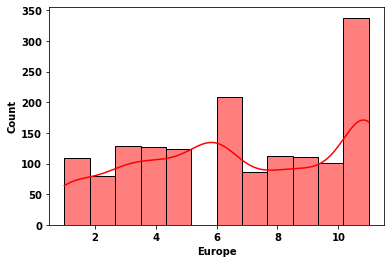

Distribution of political.knowledge
----------------------------------------------------------------------------


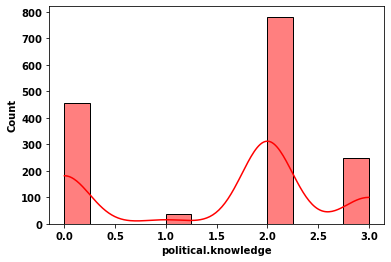

In [19]:
# Plotting histogram plots for numerical variables in lstnumericcolumns.

for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

#### Inference:

* Age column seems to have uniformly distributed among the voters of age group between 35 and 75. However, the most number of voters are around the age of 40s, 50s and 70s.

* Most of the voters gave assessment rating of 3 and 4 out of 5 to the national economic condition which indicates towards a good national economic condition.

* Most voters also gave same kind of assessment rating to the household economic condition as above, maximum voters have given rating 3 and 4 out of 5 in household economic condition, however there are also some voters who are highly sattisfied and dissatisfied.

* Distribution of Blair column clearly suggests that the maximum number of voters i.e. around 850 voters are quite sattisfied by the leadership of Labour party and given an assessment rating of 4 out of 5. 

* After analysing the distribution of Hague column, I can conclude that the voters are mixed in their opinion, a good number of around 600 voters have given assessment rating of 2 out of 5 and around 550 voters have given assessment rating of 4 out of 5. It also shows that around 250 voters have given rating of 1 out 5 which shows quite a dissatisfaction towards the leadership of conservative party.

* Distribution of Europe column shows the eurosceptic sentiment among the voters, around 900 voters have given assessment rating of more than 6 out of 11 which show quite a strong eurosceptic sentiment among the majority of voters in the given sample of 1525 voters.

* Distribution of Political Knowledge column suggests a good number around 1100 voters have knowledge about the parties position on European integration.

In [20]:
# Defining function for making Boxplots of numerical columns in the data set. 

def univariateAnalysis_numeric(column,nbins):
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=election[column])
    plt.show()

BoxPlot of age
----------------------------------------------------------------------------


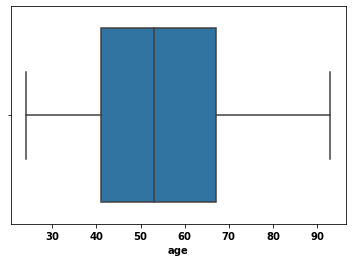

BoxPlot of economic.cond.national
----------------------------------------------------------------------------


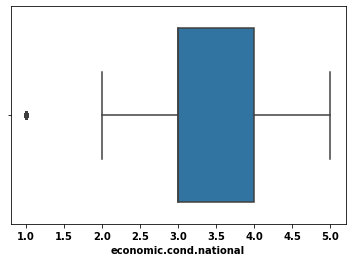

BoxPlot of economic.cond.household
----------------------------------------------------------------------------


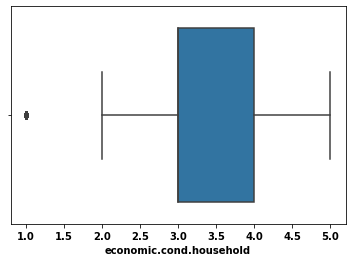

BoxPlot of Blair
----------------------------------------------------------------------------


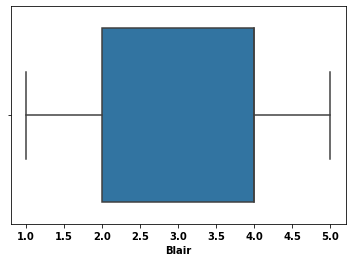

BoxPlot of Hague
----------------------------------------------------------------------------


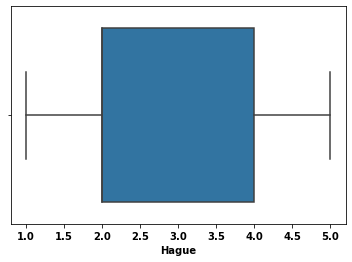

BoxPlot of Europe
----------------------------------------------------------------------------


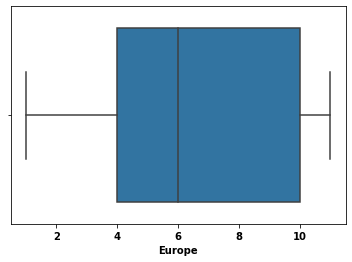

BoxPlot of political.knowledge
----------------------------------------------------------------------------


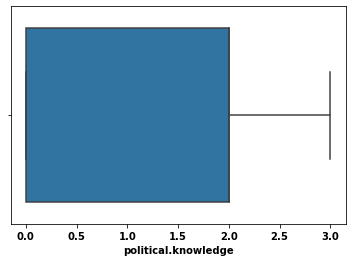

In [21]:
# Plotting Boxplots for all the numerical columns in lstnumericcolumns.

for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

#### Inference:

* Columns 'economic.cond.national' and 'economic.cond.household' have outliers. However, these outliers don't seem to affect our model much so let's not treat them.  

* No other column has an outlier except the two which are mentioned above.

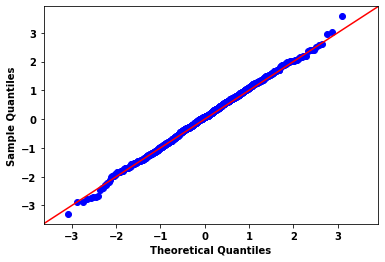

In [22]:
# Plotting QQ Plot to check whether the dataset is following the gaussion distribution?

import statsmodels.api as sm
from scipy.stats import norm
import pylab

election_norm = norm.rvs(size=1000)
sm.qqplot(election_norm, line='45')
pylab.show()

#### Inference:

* •	After observing the above plot, we can decide that the dataset is following the normal distribution. Therefore, this knowledge will help in taking better data pre-processing decision i.e. in data scaling.

### Pie Plots for Categorical Columns.

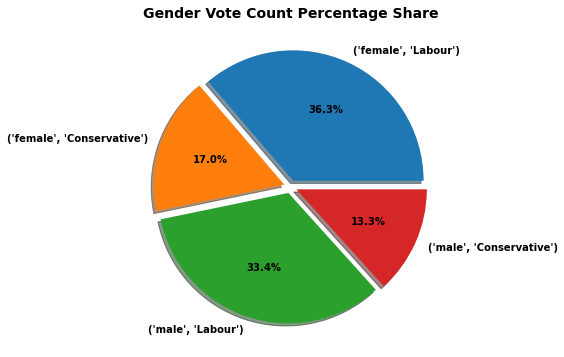

In [23]:
# Checking value counts and plotting pie plot for Gender wise vote count.

pie, ax = plt.subplots(figsize=[10,6])
labels = gen_vote_count.keys()
plt.pie(x= gen_vote_count, autopct="%.1f%%",explode=[0.05]*4, shadow=True, labels=labels, pctdistance=0.6)
plt.title("Gender Vote Count Percentage Share", fontsize=14);

#### Inference: 

* The pie plot above depicts the gender wise vote percentage share to each party. 
* It clearly shows that the 'Labour party' got 36.3% female votes and 33.4% male votes, while 'Conservative party' got 17% female votes and 13.3% male votes. 


### Bivariate and Multivariate Analysis

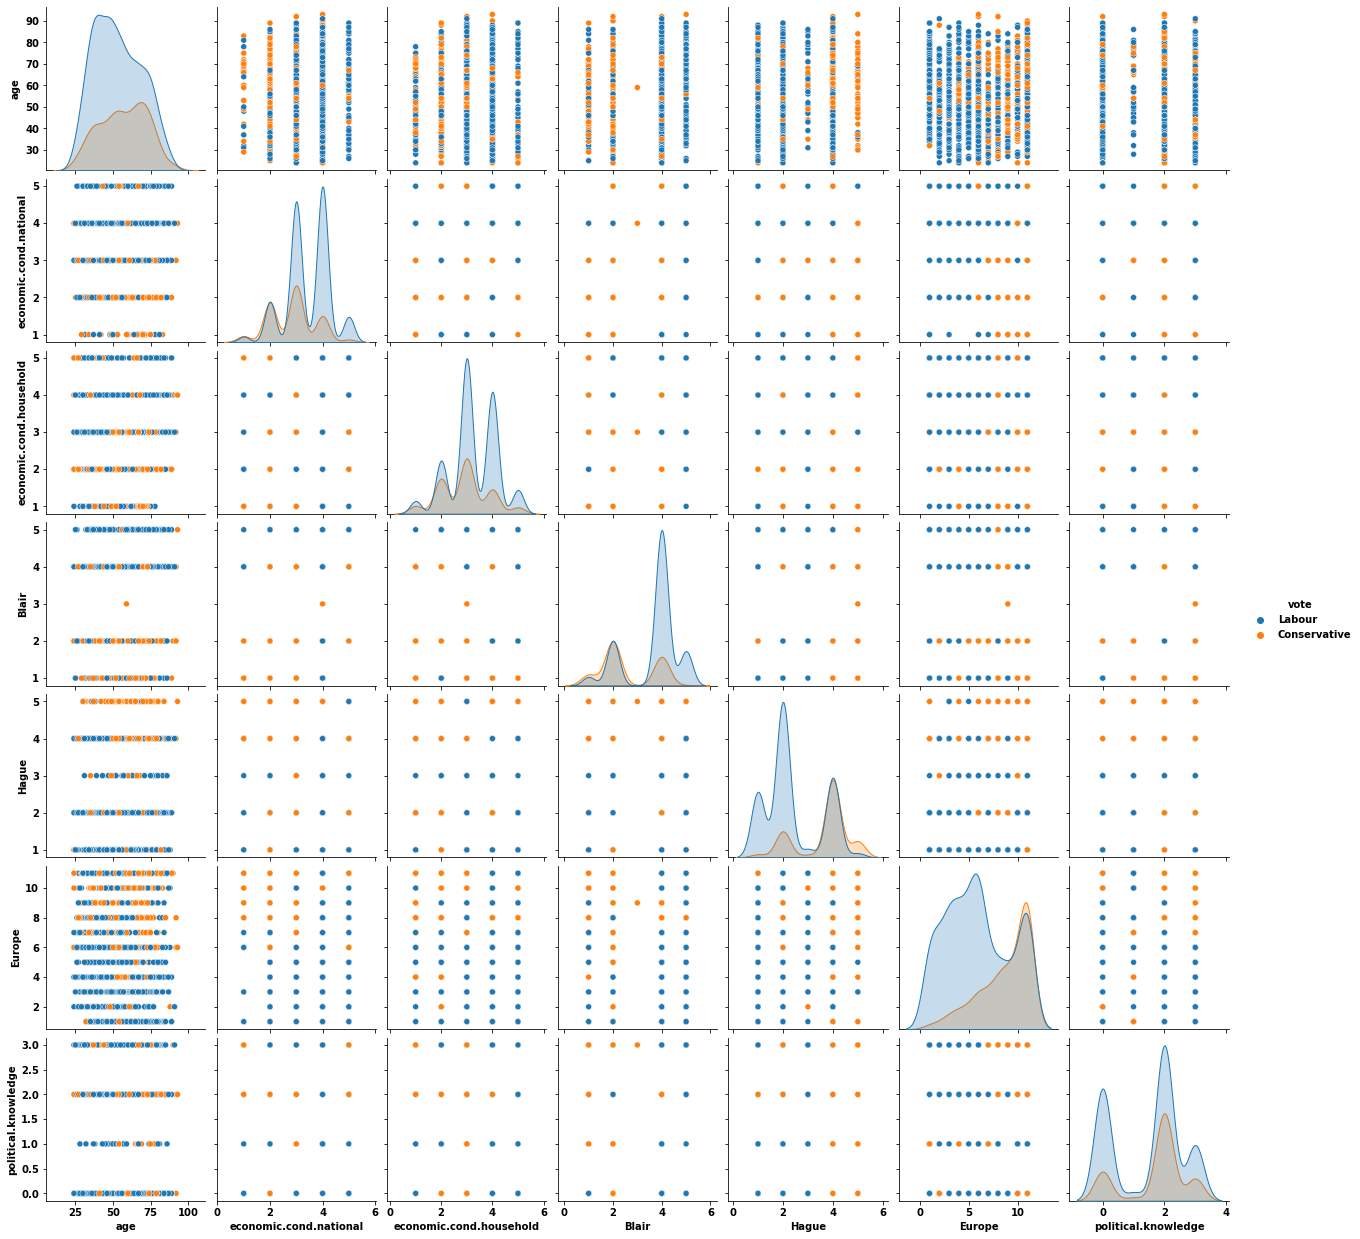

In [24]:
# Plotting pair plot on 'election dataset' with vote column as 'hue' using seaborn library.

sns.pairplot(election, hue='vote', diag_kind='kde')

#### Inference: 

* From the above pairplot, I have noticed that the most of the voters who have given high ratings in the favour of Eurosceptic sentiments, they have also voted for conservative party. 

* Also voters who voted for Labour party are well aware of the party's position on Europe integration. 

* Voters who voted for Labour Party also gave high ratings to economic conditons of Nation and Household. 

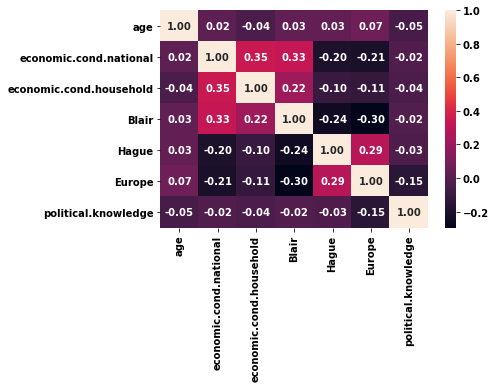

In [25]:
# Plotting heatmap correlation map on election dataset using seaborn library.

sns.heatmap(election.corr(),annot=True,fmt=".2f");

#### Inference:

* The variables 'economic.cond.national', 'economic.cond.household', and 'Blair' have moderately positively correlation of 0.35, 0.33 and 0.22 respectively. 

* Another set of moderately positively correlated variables are 'Hague' and 'Europe' i.e. 0.29. 

* Most negatively correlated variables are 'Blair' and 'Europe' i.e. -0.30. 

### 1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.

In [26]:
# Separating categorical and numerical columns from the data set.

cat=[]
num=[]
for i in election.columns:
    if election[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [27]:
# Performing one-hot dummy encoding on the categorical columns of the dataset.

election=pd.get_dummies(election, columns=cat, drop_first=True)

In [28]:
# Checking first five rows of the data set after encoding.

election.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1


#### Inference:

* Above output shows the first five rows of the dataset after dummy encoding.
* The column gender_male contains two codes '0' for females and '1' for males.
* Likewise the column vote_Labour contains two codes '1' for Labour Party's vote and '0' for Conservative party's vote.

In [29]:
# Checking if scaling is necessary here? let's check data's statistical summary to find out.

election.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0
vote_Labour,1525.0,0.697049,0.459685,0.0,0.0,1.0,1.0,1.0
gender_male,1525.0,0.467541,0.499109,0.0,0.0,0.0,1.0,1.0


#### Inference:

* From the above output, we can observe that there is a variation in standard deviation of features like if we compare the std of column 'age' with anyother feature, we can easily notice the much difference, which is not good for the machine learning algorithms that we need to implement in the further coming questions.

* Scaling becomes a necessary step for this machine learning problem because we need to fit machine learning models like Logistic Regression, Linear Discrimanant Analysis, KNN Model and Naive Bayes Model which are Gradient Descent based and Distance Based algorithms respectively. 

* However, there are two ways of scaling data i.e. normalisation and standardization. I will prefer to use standardization technique because my dataset seems to be normally distributed as confirmed in the QQ plot test above, so we need to scale the data points around their means with a unit standard deviation, also standardization scaling doesn't affect the outliers, therefore i'll be able to reduce the chances of biasness in the machine learning modelling process. 

In [30]:
# Copy all the predictor variables into X dataframe
X = election.drop('vote_Labour', axis=1)

# Copy target variable into the y dataframe.  
y = election['vote_Labour'] # labeled field is stored in y

In [31]:
# Splitting dataset into train and test data in ratio (70:30) respectively. 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [32]:
# Scaling numerical variables of the dataset using StandardScaler from sklearn.preprocessing

from sklearn.preprocessing import StandardScaler # (importing library)

# numerical features:
num_cols = ['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']

# apply standardization on numerical features:

for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train[[i]])
    
    # transform the training data column
    X_train[i] = scale.transform(X_train[[i]])
    
    # transform the testing data column
    X_test[i] = scale.transform(X_test[[i]])


 



<ipython-input-32-0f7c885d06f2>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[i] = scale.transform(X_train[[i]])
<ipython-input-32-0f7c885d06f2>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[i] = scale.transform(X_test[[i]])
<ipython-input-32-0f7c885d06f2>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

### 1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). Interpret the inferences of both models (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

### Logistic Regression

In [33]:
# Importing important libraries like LogisticRegression and metric from sklearn and applying Logistic Regression Model

from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train data.
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)

# Checking coefficients and intercept of the variables in train data.
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.321984  0.299452  0.146125  0.667121 -1.012952 -0.774098 -0.506826   

          7  intercept  
0  0.303307   1.147507  


In [34]:
# Making predictions on train and test data, printing confusion matrix and classification report for train and test data.

y_predict_train=model.predict(X_train)
model_score_LR_train=model.score(X_train,y_train)
print(model_score_LR_train)
print(metrics.confusion_matrix(y_train,y_predict_train))
print(metrics.classification_report(y_train,y_predict_train))

y_predict_test=model.predict(X_test)
model_score_LR_test=model.score(X_test,y_test)
print(model_score_LR_test)
print(metrics.confusion_matrix(y_test,y_predict_test))
print(metrics.classification_report(y_test,y_predict_test))

0.8406747891283973
[[230 102]
 [ 68 667]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067

0.8231441048034934
[[ 85  45]
 [ 36 292]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.68       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



<AxesSubplot:>

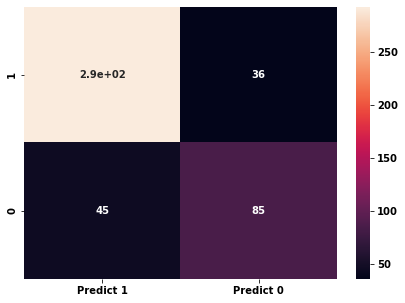

In [35]:
# Plotting Confusion Matrix of test data for class '1' and '0'

cm=metrics.confusion_matrix(y_test, y_predict_test, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

### Inference: Logistic Regression: 

* This is the base model of Logistic regression with parameters set as default. However, the model seems to have performed really well for class 1 on both train and test data with accuracy score of around 84% and 82% respectively. 

* Since, in this problem statement, we need to predict that a voter is going to vote for which party so both the classes become equally important for us. 

* The model has predicted quite well for class1 in comparison to class0 of target label.


### Linear Discriminant Analysis (LDA)

In [36]:
# Importing LinearDiscriminantAnalysis from library sklearn.discriminant_analysis.

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn import metrics

# Assigning LinearDiscriminantAnalysis() a name LDA_model and fitting it to the train data.

LDA_model=LinearDiscriminantAnalysis()
LDA_model.fit(X_train,y_train)

# Making predictions on train and test data, printing confusion matrix and classification report for train and test data.

y_train_predict=LDA_model.predict(X_train)
model_score=LDA_model.score(X_train,y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

y_test_predict=LDA_model.predict(X_test)
model_score=LDA_model.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8369259606373008
[[233  99]
 [ 75 660]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       332
           1       0.87      0.90      0.88       735

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067

0.8187772925764192
[[ 86  44]
 [ 39 289]]
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



<AxesSubplot:>

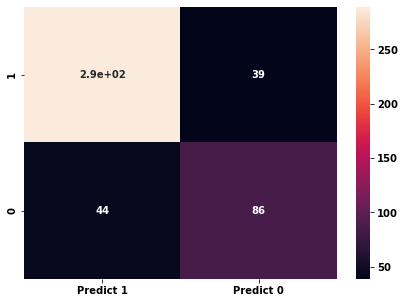

In [37]:

cm=metrics.confusion_matrix(y_test, y_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

#### Inference (Linear Discriminant Analysis):

* In this model, only default parameters have been used. The model seems to perfomed quite well. The accuracy on the train and test data are close i.e. 83.69 % and 81.87% respectively. Therefore, we cannot say that the model is underfit or overfit. 

* The performance indicators in the classification report of train and test data of class1 also seems quite good, precision, recall and f1score all are close and high for target variable in both train and test data.

* The model has performed almost same as the logistic regression. 

* * In this problem statement, model's accuracy is the most important performance indicator because we need to predict the party for which the voter is going to cast his/her vote, hence the model needs to predict accurately, in this statement both type of error is equally harmful.

* The Confusion Matrix for test data set:

* True Positives(TP): LDA Model correctly predicted that the voter has voted for Labour Party 292 times.

* True Negatives(TN): The Model correctly predicted that the voter has voted for Conservative Party 86 times.

* False Positives(FP): The Model incorrectly predicted that they voted for Labour party 44 times ('Type1 error).

* False Negatives(FN): The Model incorrectly predicted that they voted for Conservative Party 39 times ) (Type2 error).


### 1.5) Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting).

### KNN Model

In [38]:
# Importing library KNeighborsClassifier from sklearn.neighbors.

from sklearn.neighbors import KNeighborsClassifier
#from sklearn import metrics

# Assigning KNeighbors.Classifier a name KNN_model and fittin it on train data.
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

# Making predictions on train and test data, printing confusion matrix and classification report for train and test data.

y_train_predict=KNN_model.predict(X_train)
model_score=KNN_model.score(X_train,y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

y_test_predict=KNN_model.predict(X_test)
model_score=KNN_model.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8612933458294283
[[245  87]
 [ 61 674]]
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       332
           1       0.89      0.92      0.90       735

    accuracy                           0.86      1067
   macro avg       0.84      0.83      0.83      1067
weighted avg       0.86      0.86      0.86      1067

0.8275109170305677
[[ 90  40]
 [ 39 289]]
              precision    recall  f1-score   support

           0       0.70      0.69      0.69       130
           1       0.88      0.88      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



<AxesSubplot:>

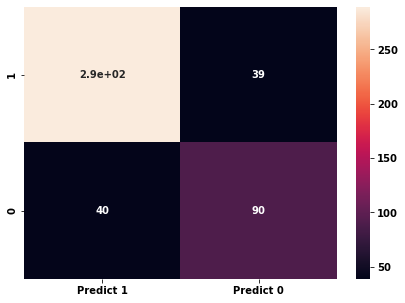

In [39]:
# Plotting Confusion Matrix of test data for class '1' and '0'

cm=metrics.confusion_matrix(y_test, y_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

#### Inference(KNN Model):

* The KNN Model has performed quite well on trained data but did not perform equally well on test data. 
* The accuracy score for the train data is 86.12% and for the test data is 82.75%. 
* The performance indicators like 'precision' in the classification report of train and test data seems good with precision of 89% for train data and 88% for test data. 
* Other performance indicators like recall and f1-score have shown good results on train data i.e 92% and 90% but shown comparatively low results on test data i.e. 88% and 88%.
* However, this model has performed better than the above two models i.e. Logistic Regression and LDA.

* The Confusion Matrix for test data set:

* True Positives(TP): KNN Model correctly predicted that the voter has voted for Labour Party 292 times.

* True Negatives(TN): The Model correctly predicted that the voter has voted for Conservative Party 90 times.

* False Positives(FP): The Model incorrectly predicted that they voted for Labour party 40 times ('Type1 error).

* False Negatives(FN): The Model incorrectly predicted that they voted for Conservative Party 50 times ) (Type2 error).
 

### Naive Bayes

In [40]:
# Importing GaussianNB algorithm from sklearn.naive_bayes library.

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# Assigning name NB_model to GaussianNB() and fitting it to the train data.
NB_model=GaussianNB()
NB_model.fit(X_train,y_train)

# Making predictions on train and test data, printing confusion matrix and classification report for train and test data.

y_train_predict=NB_model.predict(X_train)
model_score=NB_model.score(X_train,y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

y_test_predict=NB_model.predict(X_test)
model_score=NB_model.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8331771321462043
[[240  92]
 [ 86 649]]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067

0.8253275109170306
[[ 94  36]
 [ 44 284]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



<AxesSubplot:>

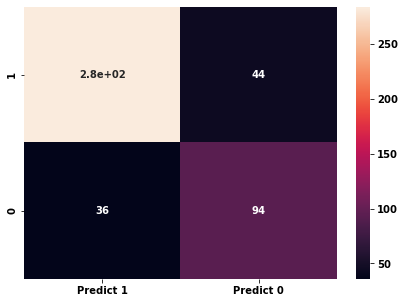

In [41]:
# Plotting Confusion Matrix of test data for class '1' and '0'

cm=metrics.confusion_matrix(y_test, y_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

### Inference(Naive Bayes):

* For this model also, I have chosen default parameters and the model has performed similar to model 'LDA'. 
* The accuracy for the train data set is 83.31% and for the test data set is 82.53%. 
* Other performance indicators like 'precision','recall', and 'f1-score' have also shown quite good performance on both train and test data. 

* The confusion matrix for test data set:

* True Positives(TP): Naive Bayes Model correctly predicted that the voter has voted for Labour Party 282 times.

* True Negatives(TN): Naive Bayes Model correctly predicted that the voter has voted for Conservative Party 94 times.

* False Positives(FP): Naive Bayes Model incorrectly predicted that they voted for Labour party 36 times ('Type1 error).

* False Negatives(FN): The Model incorrectly predicted that they voted for Conservative Party 44 times ) (Type2 error).

### 1.6) Model Tuning (4 pts) , Bagging ( 1.5 pts) and Boosting (1.5 pts). Apply grid search on each model (include all models) and make models on best_params. Define a logic behind choosing particular values for different hyper-parameters for grid search. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.

### Model Tuning for model 'Logistic Regression'

In [42]:
# Creating param_grid contaning dictionary of model tuning parameters like 'penalty','C','class_weight','solver'.

param_grid = [{
                'penalty' : ['l1','l2','elasticnet',None],
                'C' : np.logspace(-2,2,5),
                'class_weight' : ['balanced',None],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    
               
               }]

In [43]:
# Importing library GridSearchCV and performing GridSearchCV with estimator LogisticRegression, param_grid, cross validation=5 identified as clf 


from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)


In [44]:
# Fitting the clf to X_train and y_train data and defined as best_clf.

best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   29.0s finished


In [45]:
# printing best_clf

best_clf

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                          'class_weight': ['balanced', None],
                          'penalty': ['l1', 'l2', 'elasticnet', None],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             verbose=True)

In [46]:
# printing best parameters in best_clf

best_clf.best_params_

{'C': 0.01, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}

In [47]:
# Using best parameters under best_clf to predict on train and test data, also finding the model score, printing confusion matrix and classification report.

y_predict_train=best_clf.predict(X_train)
best_clf_score_LR_train=best_clf.score(X_train,y_train)
print(best_clf_score_LR_train)
print(metrics.confusion_matrix(y_train,y_predict_train))
print(metrics.classification_report(y_train,y_predict_train))

y_predict_test=best_clf.predict(X_test)
best_clf_score_LR_test=best_clf.score(X_test,y_test)
print(best_clf_score_LR_test)
print(metrics.confusion_matrix(y_test,y_predict_test))
print(metrics.classification_report(y_test,y_predict_test))

0.8350515463917526
[[233  99]
 [ 77 658]]
              precision    recall  f1-score   support

           0       0.75      0.70      0.73       332
           1       0.87      0.90      0.88       735

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.84      0.83      1067

0.8187772925764192
[[ 89  41]
 [ 42 286]]
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       130
           1       0.87      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



<AxesSubplot:>

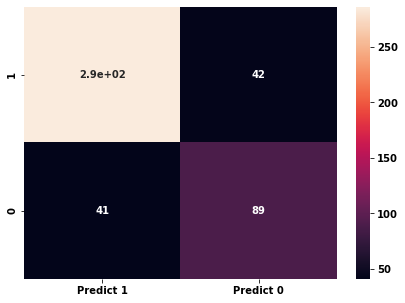

In [48]:
# Plotting Confusion Matrix of test data for class '1' and '0'

cm=metrics.confusion_matrix(y_test, y_predict_test, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

#### Inference for Logistic Regression Model after tuning.

* For tuning Logistic Regression model, GridSearchCV is done on different values of hyperparameters such as penalty , C, class weight and solvers with estimator as 'LogisticRegression' and cross validation = 5. 

* After tuning, best parameters for the model are as follows : {'C': 0.01, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}

* Accuracy under model score for train and test data is approx 84% and 82% which is exactly the same as default base model. 

* On comparing the base and tuned model, we can notice slight differences of 1 or 2 points in precision, recall and f1-score of train and test data but these miniscule diffences are not making any significant impact on overall performance of the models. 
       

### Model Tuning for model KNN

In [49]:
#  Creating param_grid1 with model tuning parameters like 'n_neighbors', 'weights'. 

param_grid1 = [{
                'n_neighbors' : [3,4,5,6,7,8],
                'weights': ['uniform', 'distance'],
                
}]

In [50]:
# Performing GridSearchCV with estimator KNeighborsClassifier, param_grid, cross validation=5 identified as clf1. 


clf1 = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid1, cv = 5, verbose=True, n_jobs=-1)

In [51]:
# Fitting the clf1 to X_train and y_train data and defined as best_clf1

best_clf1 = clf1.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished


In [52]:
# Printing best parameters in best_clf1

best_clf1.best_params_

{'n_neighbors': 7, 'weights': 'uniform'}

In [53]:
# Using best parameters under best_clf1 to predict on train and test data, also finding the model score, printing confusion matrix and classification report.

y_train_predict=best_clf1.predict(X_train)
model_score=best_clf1.score(X_train,y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

y_test_predict=best_clf1.predict(X_test)
model_score=best_clf1.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8481724461105904
[[239  93]
 [ 69 666]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       332
           1       0.88      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.85      0.85      0.85      1067

0.8231441048034934
[[ 86  44]
 [ 37 291]]
              precision    recall  f1-score   support

           0       0.70      0.66      0.68       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



<AxesSubplot:>

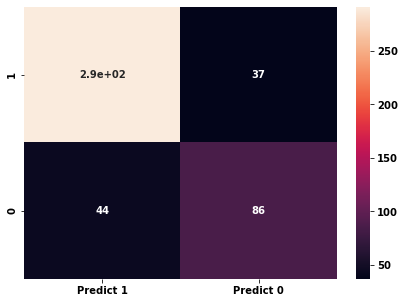

In [54]:
# Plotting Confusion Matrix of test data for class '1' and '0'

cm=metrics.confusion_matrix(y_test, y_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

### Inference for KNN Model after tuning.

* For tuning KNN model, GridSearchCV is done on different values of hyperparameters such as  'n-neighbors' from (3 to 8) and 'weights' - ('uniform' and 'distance') with estimators as 'LogisticRegression' and cross validation = 5. 

* After tuning, best parameters for the model are {'n_neighbors': 7, 'weights': 'uniform'}. 

* In tuned KNN model, the accuracy for train and test data is approx 85% and 82% respectively which is slightly less than base model i.e. 86% and 83% for train and test data set. 

* However, there are very slight differences of 1 or 2 points in the performance metrics like precision, recall and f1-score of both the models which hardly has any significance. 

### Model Tuning for Linear Discriminant Analysis

In [55]:
#  Creating param_grid2 contaning model tuning parameters like 'solver', 'shrinkage'.

param_grid2 = [{
                'solver' : ['svd', 'lsqr', 'eigen'],
                'shrinkage': ['auto', 'float', None],
                
}]

In [56]:
# Applying GridSearchCV on LinearDiscriminantAnalysis() with param_grid including cv=5, verbose=True and n_jobs=-1.

clf2 = GridSearchCV(LinearDiscriminantAnalysis(), param_grid = param_grid2, cv = 5, verbose=True, n_jobs=-1)

In [57]:
# Fitting Assigning best_Clf2 a new variable and fitting clf2 to train data.

best_clf2 = clf2.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    2.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    2.4s finished


In [58]:
# checking best parameters

best_clf2.best_params_

{'shrinkage': 'auto', 'solver': 'lsqr'}

In [59]:
# Printing model score for train and test data along with confusion matrix and classification reports.

y_train_predict=best_clf2.predict(X_train)
model_score=best_clf2.score(X_train,y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

y_test_predict=best_clf2.predict(X_test)
model_score=best_clf2.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8406747891283973
[[238  94]
 [ 76 659]]
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       332
           1       0.88      0.90      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.81      0.81      1067
weighted avg       0.84      0.84      0.84      1067

0.8231441048034934
[[ 89  41]
 [ 40 288]]
              precision    recall  f1-score   support

           0       0.69      0.68      0.69       130
           1       0.88      0.88      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



<AxesSubplot:>

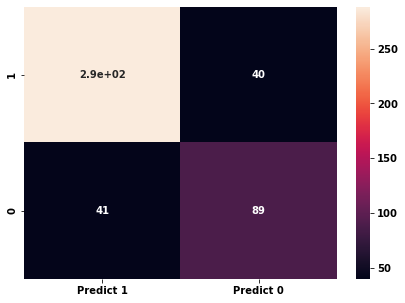

In [60]:
# Plotting Confusion Matrix of test data for class '1' and '0'

cm=metrics.confusion_matrix(y_test, y_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

### Inference for Linear Discriminant Analysis Model after tuning

* For tuning Logistic Regression model, GridSearchCV is done on different values of hyperparameters such as 'solver'-('svd', 'lsqr', 'eigen') and 'shrinkage'-('auto', 'float', None) with estimators as 'Linear Discriminant Analysis' and cross validation = 5. 

* After tuning, best parameters for the model are {'shrinkage': 'auto', 'solver': 'lsqr'}. 

* In tuned LDA model, the accuracy for train and test data is approx 84.06% and 82.31% respectively which is almost same as base model i.e. 83.69% and 81.87% for train and test data set. 

* However, there are very slight differences of 1 or 2 points in the performance metrics like precision, recall and f1-score of both the models which hardly has any significance. 

### Bagging with DecisionTreeClassifier


In [61]:
# Importing important algorithms like 'BaggingClassifier', 'RandomForestClassifier' and 'DecisionTreeClassifier' from library sklearn. 

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Assigning variable 'cart' the DecisionTreeClassifier with model tuning parameters like 'max_depth' and 'max_features'. 

cart=DecisionTreeClassifier(max_depth=5, max_features=6)
RF = RandomForestClassifier

# Assigning variable 'Bagging_model' the BaggingClassifier with parameters like base_estimator 'cart' and n_estimators and fitting it to train data. 
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=250, random_state=1)
Bagging_model.fit(X_train,y_train)

# Printing model score for train and test data along with confusion matrix and classification reports.

y_train_predict=Bagging_model.predict(X_train)
model_score=Bagging_model.score(X_train,y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

y_test_predict=Bagging_model.predict(X_test)
model_score=Bagging_model.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8706654170571696
[[246  86]
 [ 52 683]]
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       332
           1       0.89      0.93      0.91       735

    accuracy                           0.87      1067
   macro avg       0.86      0.84      0.84      1067
weighted avg       0.87      0.87      0.87      1067

0.8406113537117904
[[ 91  39]
 [ 34 294]]
              precision    recall  f1-score   support

           0       0.73      0.70      0.71       130
           1       0.88      0.90      0.89       328

    accuracy                           0.84       458
   macro avg       0.81      0.80      0.80       458
weighted avg       0.84      0.84      0.84       458



<AxesSubplot:>

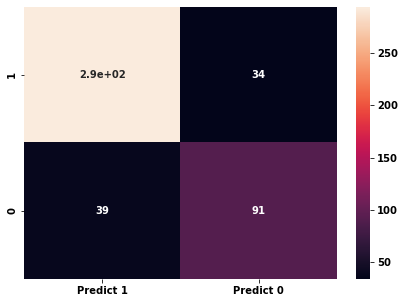

In [62]:
# Plotting Confusion Matrix of test data for class '1' and '0'

cm=metrics.confusion_matrix(y_test, y_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

### Inference for Bagging model with estimator 'Cart'

* The model has given accuracy of 87.06% on train while 84.06% on test data which is the best accuracy score so far.

* The bagging model is build with base estimator ('decisiontreeclassifier' with max depth = 5 and max features = 6), and        (n-estimator = 250). 


### Bagging with RandomForest as base_estimator


In [63]:

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# Assigning a variable 'RF' for model RandomForestClassifier with tuning parameters like 'n_estimators' ,'criterion','max_depth','min_samples_split','max_features'

#cart=DecisionTreeClassifier(max_depth=5, max_features=6)
RF = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=4,min_samples_split=2,max_features="auto")

# Assigning a variable 'Bagging_model1' with Bagging_Classifier with base_estimator 'RF' and other hyper tuning parameters like 'n_estimators' then fitting this Bagging_model1 to train data.
Bagging_model1=BaggingClassifier(base_estimator=RF,n_estimators=100, random_state=1)
Bagging_model1.fit(X_train,y_train)

# Printing model score for train and test data along with confusion matrix and classification reports.

y_train_predict=Bagging_model1.predict(X_train)
model_score=Bagging_model1.score(X_train,y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

y_test_predict=Bagging_model1.predict(X_test)
model_score=Bagging_model1.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8537956888472352
[[213 119]
 [ 37 698]]
              precision    recall  f1-score   support

           0       0.85      0.64      0.73       332
           1       0.85      0.95      0.90       735

    accuracy                           0.85      1067
   macro avg       0.85      0.80      0.82      1067
weighted avg       0.85      0.85      0.85      1067

0.8384279475982532
[[ 82  48]
 [ 26 302]]
              precision    recall  f1-score   support

           0       0.76      0.63      0.69       130
           1       0.86      0.92      0.89       328

    accuracy                           0.84       458
   macro avg       0.81      0.78      0.79       458
weighted avg       0.83      0.84      0.83       458



<AxesSubplot:>

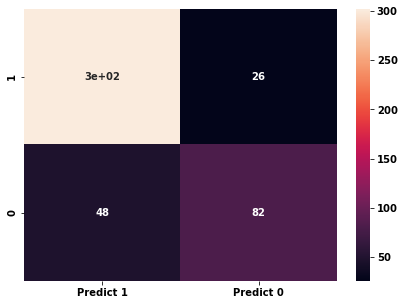

In [64]:
# Plotting Confusion Matrix of test data for class '1' and '0'

cm=metrics.confusion_matrix(y_test, y_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

### Inference for Bagging Model with RandomForestClassifier as base_estimator

* After trying various values, here are the selected values in parameters of RandomForestClassifier for this model: (n_estimators=100,criterion='gini',max_depth=4,min_samples_split=2,max_features="auto")

* The model performed almost equally well on both train and test data with accuracy score of 85% and 84% respectively.

* The perfomance indicators in the classification reports for class1 are better than class0, possibly due to class imbalance.

* Overall in comparison to other models, this is one of the best performing model so far. 

### AdaBoost

In [65]:
# Importing AdaBoostClassifier from library sklearn.ensemble and importing DecisionTreeClassifier from sklearn.tree

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Assigning a variable cart to the algorithm DecisionTreeClassifier with tuning parameters like 'max_depth' and 'max_features'.

cart = DecisionTreeClassifier(max_depth=2, max_features=5) # weak model to give it as a base estimator to AdaBoost

# Assigning a variable ADB_model to the algorithm AdaBoostClassifier with tuning parameters like n_estimators and fitting the model to the train data.

ADB_model=AdaBoostClassifier(n_estimators=250,random_state=1)
ADB_model.fit(X_train,y_train)

# Printing model score for train and test data along with confusion matrix and classification reports.

y_train_predict=ADB_model.predict(X_train)
model_score=ADB_model.score(X_train,y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

y_test_predict=ADB_model.predict(X_test)
model_score=ADB_model.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8481724461105904
[[237  95]
 [ 67 668]]
              precision    recall  f1-score   support

           0       0.78      0.71      0.75       332
           1       0.88      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.85      0.85      0.85      1067

0.8165938864628821
[[ 88  42]
 [ 42 286]]
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       130
           1       0.87      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.77      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



<AxesSubplot:>

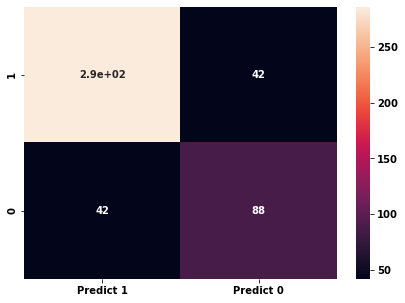

In [66]:
# Plotting Confusion Matrix of test data for class '1' and '0'

cm=metrics.confusion_matrix(y_test, y_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

### Inference of AdaBoost: 

* The above model is built with 'DecisionTreeClassifier' as an estimator(carrying max depth=2 and max_features=5) also n_estimators=250. These parameters are chosen after several testing with other parameters but the best result has been given with the above parameters. 

* The accuracy of model on train data set is approx 85% and on test data set is around 82%. 

* The perfomance indicators like precision, recall, f1-score showing quite good results for class1 on train and test data set but compartively poor results for class0 on train and test data set.



### Gradient Boosting

In [67]:
# Importing important algorithm GradientBoostingClassifier from sklearn.ensemble.

from sklearn.ensemble import GradientBoostingClassifier


# Assigning a variable GDB_model to GradientBoostingClassifier with the model tuning parameters like 'n_estimators','criterion','max_features','max_depth' and fitting it to the train data.
GDB_model=GradientBoostingClassifier(random_state=1,  n_estimators=200,criterion='friedman_mse',max_features=5,max_depth=2)
GDB_model.fit(X_train,y_train)


# Printing model score for train and test data along with confusion matrix and classification reports.

y_train_predict=GDB_model.predict(X_train)
model_score=GDB_model.score(X_train,y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

y_test_predict=GDB_model.predict(X_test)
model_score=GDB_model.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8753514526710403
[[252  80]
 [ 53 682]]
              precision    recall  f1-score   support

           0       0.83      0.76      0.79       332
           1       0.90      0.93      0.91       735

    accuracy                           0.88      1067
   macro avg       0.86      0.84      0.85      1067
weighted avg       0.87      0.88      0.87      1067

0.8362445414847162
[[ 99  31]
 [ 44 284]]
              precision    recall  f1-score   support

           0       0.69      0.76      0.73       130
           1       0.90      0.87      0.88       328

    accuracy                           0.84       458
   macro avg       0.80      0.81      0.80       458
weighted avg       0.84      0.84      0.84       458



<AxesSubplot:>

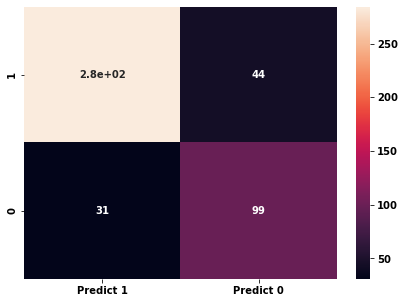

In [68]:
# Plotting Confusion Matrix of test data for class '1' and '0'.

cm=metrics.confusion_matrix(y_test, y_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

### Inference of Gradient Boost: 

* This model is built with Gradient Boosting Classifier with a little tuning in parameters like n_estimator=200, max_features=5, max_depth=2.

* The model has performed comparatively better on train data than test data. 

* The model accuracy on train data set is 87.53% and on test data set is 83.62%. 

* The model is showing comparatively better results on perfomance metrics of class1 than class0. 

### 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts) Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.(3 pts)

* As we have already seen the confusion matrix and classification report for all the models above. 

* Now plotting ROC Curve and calculating roc_auc score for all the models then do comparison of all the performance matrices among all the models through a structed table. 

### 1- Roc_Auc Score and ROC Curve for base model of Logistic Regression

roc_auc_score for Logistic Regression:  0.8826219512195121


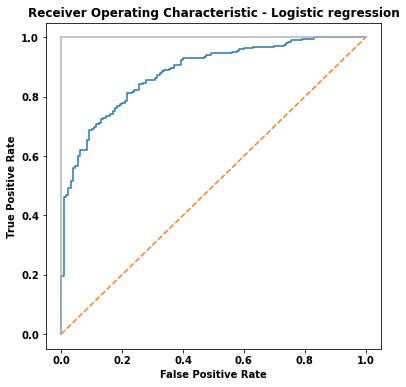

In [69]:
# Importing and Creating Roc_AUC Curve and Score for logistic regression

from sklearn.metrics import roc_curve, roc_auc_score
clf_reg = LogisticRegression()
clf_reg.fit(X_train, y_train);
y_score1 = clf_reg.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score1))

# plotting roc_curve

plt.subplots(1, figsize=(6,6))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### 2- Roc_Auc Score and ROC Curve for base model of Linear Discriminant Analysis

roc_auc_score for Linear Discriminant Analysis:  0.8837711069418386


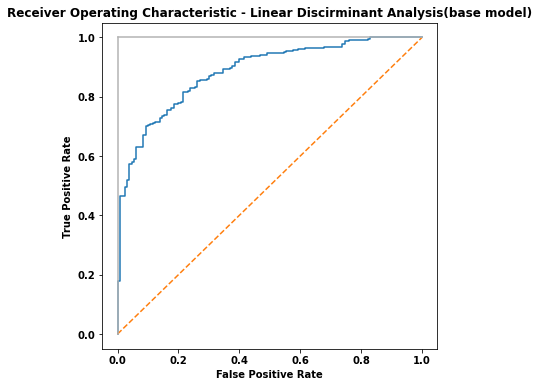

In [70]:
# Importing and Creating Roc_AUC Curve and Score for linear discriminant analysis

from sklearn.metrics import roc_curve, roc_auc_score
clf_LDA = LinearDiscriminantAnalysis()
clf_LDA.fit(X_train, y_train);
y_score2 = clf_LDA.predict_proba(X_test)[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
print('roc_auc_score for Linear Discriminant Analysis: ', roc_auc_score(y_test, y_score2))

# plotting roc_curve

plt.subplots(1, figsize=(6,6))
plt.title('Receiver Operating Characteristic - Linear Discirminant Analysis(base model)')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### 3- Roc_Auc Score and ROC Curve for base model of KNN

roc_auc_score for Linear Discriminant Analysis:  0.8682575046904315


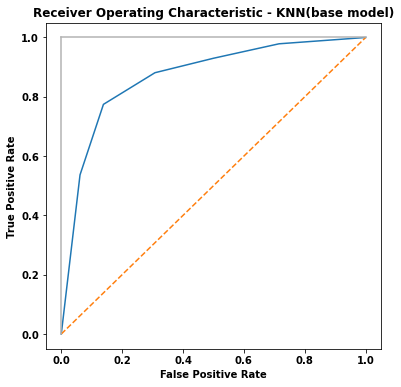

In [71]:
# Importing and Creating Roc_AUC Curve and Score for KNN Base Model

from sklearn.metrics import roc_curve, roc_auc_score
clf_KNN = KNeighborsClassifier()
clf_KNN.fit(X_train, y_train);
y_score3 = clf_KNN.predict_proba(X_test)[:,1]
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score3)
print('roc_auc_score for Linear Discriminant Analysis: ', roc_auc_score(y_test, y_score3))

# plotting roc_curve

plt.subplots(1, figsize=(6,6))
plt.title('Receiver Operating Characteristic - KNN(base model)')
plt.plot(false_positive_rate3, true_positive_rate3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 4- Roc_Auc Score and ROC Curve for base model of NaiveBayes

roc_auc_score for Linear Discriminant Analysis:  0.8845450281425891


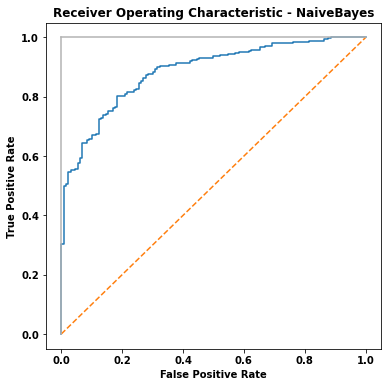

In [72]:
# Importing and Creating Roc_AUC Curve and Score for NaiveBayes.

from sklearn.metrics import roc_curve, roc_auc_score
clf_KNN = GaussianNB()
clf_KNN.fit(X_train, y_train);
y_score4 = clf_KNN.predict_proba(X_test)[:,1]
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test, y_score4)
print('roc_auc_score for Linear Discriminant Analysis: ', roc_auc_score(y_test, y_score4))

# plotting roc_curve

plt.subplots(1, figsize=(6,6))
plt.title('Receiver Operating Characteristic - NaiveBayes')
plt.plot(false_positive_rate4, true_positive_rate4)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 5- Roc_Auc Score and ROC Curve for Logistic Regression(Tuned Model)

roc_auc_score for Logistic Regression(tuned_model):  0.8837945590994372


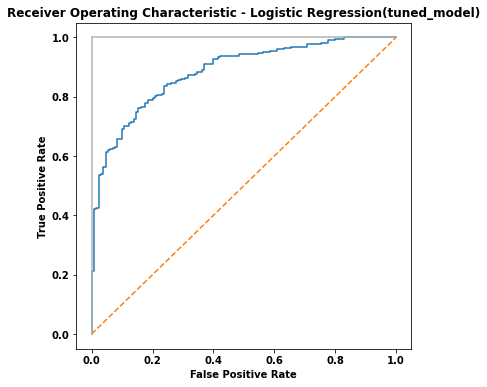

In [73]:
# Importing and Creating Roc_AUC Curve and Score for Logistic Regression(Tuned Model).

y_score5 = best_clf.predict_proba(X_test)[:,1]
false_positive_rate5, true_positive_rate5, threshold5 = roc_curve(y_test, y_score5)
print('roc_auc_score for Logistic Regression(tuned_model): ', roc_auc_score(y_test, y_score5))

# plotting roc_curve

plt.subplots(1, figsize=(6,6))
plt.title('Receiver Operating Characteristic - Logistic Regression(tuned_model)')
plt.plot(false_positive_rate5, true_positive_rate5)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 6- Roc_Auc Score and ROC Curve for Linear Discriminant Analysis(Tuned Model)

roc_auc_score for Linear Discriminant Analysis(tuned_model):  0.8852720450281425


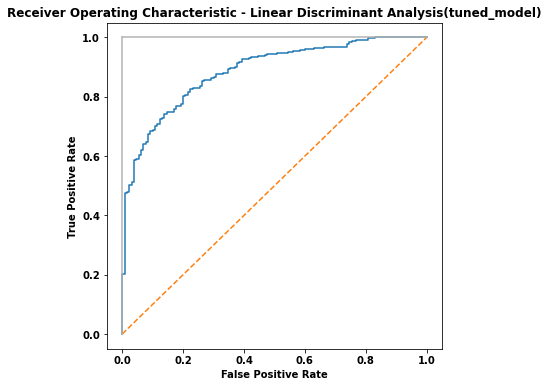

In [74]:
# Importing and Creating Roc_AUC Curve and Score for Linear Discriminant Analysis(Tuned Model).

y_score6 = best_clf2.predict_proba(X_test)[:,1]
false_positive_rate6, true_positive_rate6, threshold6 = roc_curve(y_test, y_score6)
print('roc_auc_score for Linear Discriminant Analysis(tuned_model): ', roc_auc_score(y_test, y_score6))

# plotting roc_curve

plt.subplots(1, figsize=(6,6))
plt.title('Receiver Operating Characteristic - Linear Discriminant Analysis(tuned_model)')
plt.plot(false_positive_rate6, true_positive_rate6)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 7- Roc_Auc Score and ROC Curve for KNN(Tuned Model)

roc_auc_score for KNN(tuned_model):  0.8842753283302064


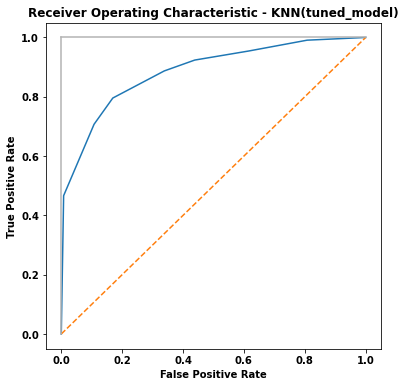

In [75]:
y_score7 = best_clf1.predict_proba(X_test)[:,1]
false_positive_rate7, true_positive_rate7, threshold7 = roc_curve(y_test, y_score7)
print('roc_auc_score for KNN(tuned_model): ', roc_auc_score(y_test, y_score7))

# plotting roc_curve

plt.subplots(1, figsize=(6,6))
plt.title('Receiver Operating Characteristic - KNN(tuned_model)')
plt.plot(false_positive_rate7, true_positive_rate7)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 8- Roc_Auc Score and ROC Curve for Bagging with Random Forest Model

roc_auc_score for Bagging with RandomForest):  0.8984287054409007


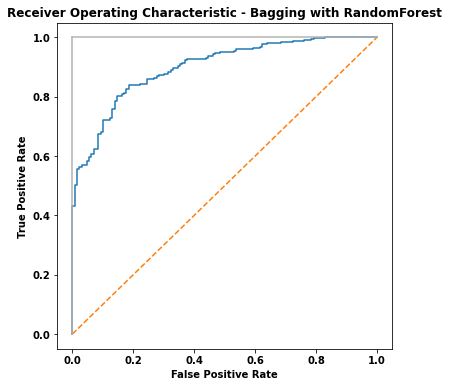

In [76]:
y_score8 = Bagging_model1.predict_proba(X_test)[:,1]
false_positive_rate8, true_positive_rate8, threshold8 = roc_curve(y_test, y_score8)
print('roc_auc_score for Bagging with RandomForest): ', roc_auc_score(y_test, y_score8))

# plotting roc_curve

plt.subplots(1, figsize=(6,6))
plt.title('Receiver Operating Characteristic - Bagging with RandomForest')
plt.plot(false_positive_rate8, true_positive_rate8)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 9- Roc_Auc Score and ROC Curve for Bagging with Decision Tree Classifier

roc_auc_score for Bagging with DecisionTreeClassifier):  0.8978658536585366


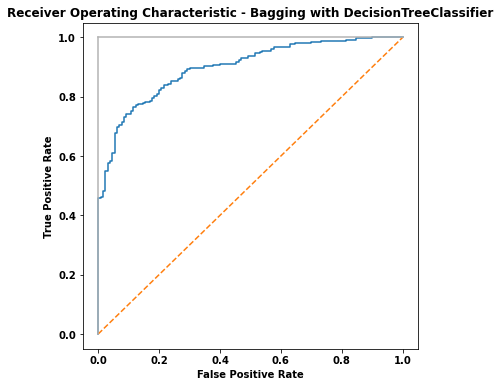

In [77]:
y_score9 = Bagging_model.predict_proba(X_test)[:,1]
false_positive_rate9, true_positive_rate9, threshold9 = roc_curve(y_test, y_score9)
print('roc_auc_score for Bagging with DecisionTreeClassifier): ', roc_auc_score(y_test, y_score9))

# plotting roc_curve

plt.subplots(1, figsize=(6,6))
plt.title('Receiver Operating Characteristic - Bagging with DecisionTreeClassifier')
plt.plot(false_positive_rate9, true_positive_rate9)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 10- Roc_Auc Score and ROC Curve for Ada Boost with DecisionTreeClassifier

roc_auc_score for AdaBoost with DecisionTreeClassifier):  0.8740970919324578


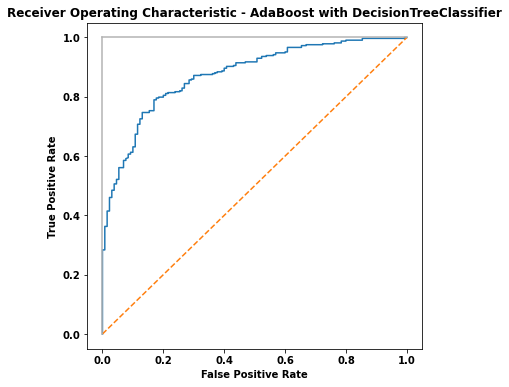

In [78]:
y_score10 = ADB_model.predict_proba(X_test)[:,1]
false_positive_rate10, true_positive_rate10, threshold10 = roc_curve(y_test, y_score10)
print('roc_auc_score for AdaBoost with DecisionTreeClassifier): ', roc_auc_score(y_test, y_score10))

# plotting roc_curve

plt.subplots(1, figsize=(6,6))
plt.title('Receiver Operating Characteristic - AdaBoost with DecisionTreeClassifier')
plt.plot(false_positive_rate10, true_positive_rate10)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 11- Roc_Auc Score and ROC Curve for Gradient Boost 

roc_auc_score for Gradient Boost):  0.8980886491557224


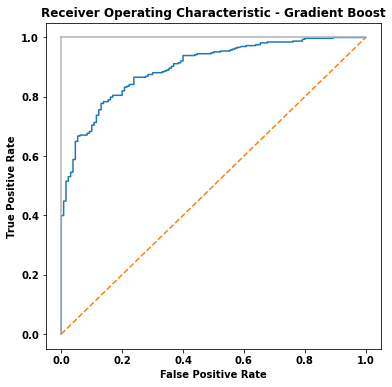

In [79]:
y_score11 = GDB_model.predict_proba(X_test)[:,1]
false_positive_rate11, true_positive_rate11, threshold11 = roc_curve(y_test, y_score11)
print('roc_auc_score for Gradient Boost): ', roc_auc_score(y_test, y_score11))

# plotting roc_curve

plt.subplots(1, figsize=(6,6))
plt.title('Receiver Operating Characteristic - Gradient Boost')
plt.plot(false_positive_rate11, true_positive_rate11)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Paste comparison of all the matrices for all models in a tabular structure.

#### Inference: 

* The above table consists of the models' accuracy score for train and test data, roc_auc score of all the models, precision,recall,f1-score of train and test data for all the base and tuned models. There are 11 models in which 4 are base models and 7 are tuned models. Individual analysis of the performance metrices of every model has been done above after every model. Here, let's look at the top 5 performing models according to my understanding.  


* 1- Baggging with RandomForestClassifier- From the above table we can notice that the Model 'Bagging using RandomForestClassifier' as base estimator has given the best accuracy score for train and test data i.e. 85.37% and 83.84%. It also has the highest ROC_Auc Score of 89.84. But when we look at the classification report of the model, it seems to have inconsistency in performances. For instance:When we look at the matrices of class0 then Precision for train data set is much higher than that of test data set, also recall for train and test is low and f1-score for test data set is little lower than train data set. Therefore, the model 'Bagging with RandomForestClassifier' seems good if we see the model's accuracy, roc_auc Score, classfication report for class1 but lacks performance on test dataset for class0.


* 2- Bagging with DecisionTreeClassifier- Other model which performed quite well is 'Bagging with DecisionTreeClassifier'. The model accuracy is 87.06 and 84.06 for train and test data respectively. Roc_Auc score is 89.78. The classification report for class1 seems good but for class0, there is inconsistency in the precision and f1-score of train and test. But if we see overall, the models seems good. 


* 3- Gradient Boost- Another good looking model is 'Gradient Boost' with accuracy score of 87.53% on train and 83.62% on test data set. Also, it has second highest ROC_AUC Score of 89.80 after 'Bagging with RandomForest' model. However, the model has high precision score for train dataset but low for test data set in class0. Except this, the model seems to have performed comparatively better on other performance matrices.  


* 4- Naive Bayes-  Now, the most consistent model in terms of its performance on train and test dataset for both the classes is 'Naive Bayes'. This model looks quite balanced in overall performance. It has almost same model accuracy for train and test data i.e. 83.31% and 82.53% respectively. The ROC_Auc Score is also among the top 5 i.e. 88.45.


* 5- LDA(tuned)- For this positiion, many models were close, but I made this decision to pick LDA(tuned) for the fifth position by comparing most important performance indicators for class0 such as 'accuracy_score' for train and test data i.e.(84.06% and 82.31%) respectively, 'roc_auc score' i.e.(88.52) and 'f1_score'i.e.(74% and 69% for train and test data respectively). Therefore, this model has performed slightly better than it's other competitor models in above mentioned parameters. 


### 1.8) Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective. There should be at least 3-4 Recommendations and insights in total. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks should only be allotted if the recommendations are correct and business specific.

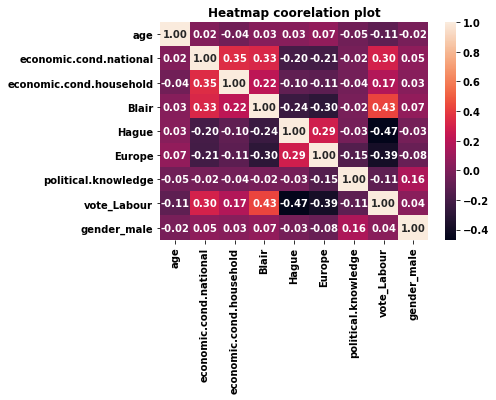

In [80]:
# Plotting heatmap correlation plot to check the correlation of vote_Labour column in order to understand the correlation between voters and other variables.

sns.heatmap(election.corr(),annot=True,fmt=".2f");
plt.title('Heatmap coorelation plot')
plt.show()

### Inference:

* After analysing the performances of all the models, I can conclude that all the models have performed fairly well in class1's training and prediction but somehow it seems difficult for the models to predict with the same precision for class0. It means our models are able to predict precisely well about the voters who are going to vote for Labour party, but it faces challenges or difficulties when they are predicting about the voters who are going to vote for conservative party.

* One reason for such behavior of our models can be unavailability of enough data in class0 or class imbalance. We have almost 70% data in class1 i.e. voters of Labour party and 30% in class0 i.e. voters of Conservative party, so one of the suggestion would be to increase the data of voters of conservative party.  

* One way of accumulating the data of voters of conservative party would be to look for people who are Eurosceptic, because there is a good coorelation between the voters of conservative party and Eurosceptic sentiment.

* With the available dataset of 1525 voters, Labour Party is getting clear majority votes. But to get the right predictions for both the party, either we need to reduce the data of Labour Party's voters or increase the data of conservative party's voters.However, reducing data point from the data is not a very good option. 
 
* Likewise, voters who talks highly or given high rating to the nation's economic condition and those who praises the leadership of Labour party are more likely to vote for Labour Party, since there is mild correlation between the two. So, I would suggest to increase data of people with eurosceptic sentiments or people who praises the leadership of conservative party. 

## <font color='blue'> Problem 2: In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

####  <font color='blue'> 1. President Franklin D. Roosevelt in 1941
#### <font color='blue'> 2. President John F. Kennedy in 1961
#### <font color='blue'> 3. President Richard Nixon in 1973

In [81]:
#Importing important libraries

import numpy as np
import pandas as pd
import nltk

import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')
import nltk
nltk.download('punkt')

import random
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer

!pip install wordcloud

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 2.1) Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)

In [82]:
# Assigning names to the speeches of Presidents.

Roosevelt = inaugural.raw('1941-Roosevelt.txt')
Kennedy = inaugural.raw('1961-Kennedy.txt')
Nixon = inaugural.raw('1973-Nixon.txt')

In [83]:
# Counting number of characters without spaces in the given documents.

Roosevelt_ws = Roosevelt.replace(" ","") #Roosevelt_ws is the text document without space.
Kennedy_ws  = Kennedy.replace(" ","")
Nixon_ws = Nixon.replace(" ","")

print('Number of characters in the 1941 speech of President Roosevelt:',len(Roosevelt_ws))
print('Number of characters in the 1961 speech of President Kennedy:',len(Kennedy_ws))
print('Numver of characters in the 1973 speech of President Nixon:',len(Nixon_ws))

Number of characters in the 1941 speech of President Roosevelt: 6249
Number of characters in the 1961 speech of President Kennedy: 6255
Numver of characters in the 1973 speech of President Nixon: 8223


In [84]:
# Counting number of words in the given documents. 

words_R = Roosevelt.split()
words_K = Kennedy.split()
words_N = Nixon.split()
print('Number of words in the 1941 speech of President Roosevelt:',len(words_R))
print('Number of words in the 1961 speech of President Kennedy:',len(words_K))
print('Numver of words in the 1973 speech of President Nixon:',len(words_N))

Number of words in the 1941 speech of President Roosevelt: 1360
Number of words in the 1961 speech of President Kennedy: 1390
Numver of words in the 1973 speech of President Nixon: 1819


In [85]:
# Importing and using the important nltk.tokenize library for extracting sentences from the raw text.

import nltk.tokenize

Roosevelt_sentences=nltk.sent_tokenize(Roosevelt)
Kennedy_sentences= nltk.sent_tokenize(Kennedy)
Nixon_sentences= nltk.sent_tokenize(Nixon)

print('Number of sentences in the 1941 speech of President Roosevelt:',len(Roosevelt_sentences))
print('Number of sentences in the 1961 speech of President Kennedy:',len(Kennedy_sentences))
print('Numver of sentences in the 1973 speech of President Nixon:',len(Nixon_sentences))

Roosevelt_sentences[0]

Number of sentences in the 1941 speech of President Roosevelt: 68
Number of sentences in the 1961 speech of President Kennedy: 52
Numver of sentences in the 1973 speech of President Nixon: 68


'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.'

### 2.2) Remove all the stopwords from the three speeches. Show the word count before and after the removal of stopwords. Show a sample sentence after the removal of stopwords.

In [86]:
# Checking the word count before the removal of stopwords.

print('Number of words in the 1941 speech of President Roosevelt before removal of stopwords is:',len(words_R))
print('Number of words in the 1961 speech of President Kennedy before removal of stopwords is:',len(words_K))
print('Numver of words in the 1973 speech of President Nixon before removal of stopwords is:',len(words_N))

Number of words in the 1941 speech of President Roosevelt before removal of stopwords is: 1360
Number of words in the 1961 speech of President Kennedy before removal of stopwords is: 1390
Numver of words in the 1973 speech of President Nixon before removal of stopwords is: 1819


In [87]:
PS = PorterStemmer()

In [88]:
# defining stopwords

stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
stopwords.extend(["--"])

In [89]:
# Case lowering in speeches of Roosevelt, removing stopwords with punctuations and counting number of words.

Roosevelt_lower = (w.lower() for w in inaugural.words('1941-Roosevelt.txt'))
Roosevelt_clean = [word for word in Roosevelt_lower if word not in stopwords]
Roosevelt_freq = nltk.FreqDist(Roosevelt_clean)
print('Number of words in the 1941 speech of President Roosevelt after removal of stopwords and punctuations is:',len(Roosevelt_clean))

Number of words in the 1941 speech of President Roosevelt after removal of stopwords and punctuations is: 632


In [90]:
# Case lowering in speeches of Kennedy, removing stopwords with punctuations.

Kennedy_lower = (w.lower() for w in inaugural.words('1961-Kennedy.txt'))
Kennedy_clean = [word for word in Kennedy_lower if word not in stopwords]
Kennedy_freq = nltk.FreqDist(Kennedy_clean)
print('Number of words in the 1941 speech of President Kennedy after removal of stopwords and punctuations is:',len(Kennedy_clean))

Number of words in the 1941 speech of President Kennedy after removal of stopwords and punctuations is: 697


In [91]:
# Case lowering in speeches of Nixon, removing stopwords with punctuations and counting number of words.

Nixon_lower = (w.lower() for w in inaugural.words('1973-Nixon.txt'))
Nixon_clean = [word for word in Nixon_lower if word not in stopwords]
Nixon_freq = nltk.FreqDist(Nixon_clean)
print('Number of words in the 1941 speech of President Nixon after removal of stopwords and punctuations is:',len(Nixon_clean))

Number of words in the 1941 speech of President Nixon after removal of stopwords and punctuations is: 836


In [92]:
# Showing the sample speeches of the Presidents Roosevelt, Kennedy and Nixon after removing stopwords and punctuations

print('The speech of President Roosevelt after removing stopwords:')
print('\n')
print(" ".join(Roosevelt_clean))

print('\n')

print('The speech of President Kennedy after removing stopwords:')
print('\n')
print(" ".join(Kennedy_clean))

print('\n')

print('The speech of President Nixon after removing stopwords:')
print('\n')
print(" ".join(Nixon_clean))

The speech of President Roosevelt after removing stopwords:


national day inauguration since 1789 people renewed sense dedication united states washington day task people create weld together nation lincoln day task people preserve nation disruption within day task people save nation institutions disruption without us come time midst swift happenings pause moment take stock recall place history rediscover may risk real peril inaction lives nations determined count years lifetime human spirit life man three score years ten little little less life nation fullness measure live men doubt men believe democracy form government frame life limited measured kind mystical artificial fate unexplained reason tyranny slavery become surging wave future freedom ebbing tide americans know true eight years ago life republic seemed frozen fatalistic terror proved true midst shock acted acted quickly boldly decisively later years living years fruitful years people democracy brought us greater security h

### 2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [93]:
print("The top three words in Roosevelt's Speech after removing stopwords and punctuations are :\n",Roosevelt_freq.most_common(3))
print('\n')
print("The top three words in Kennedy's Speech after removing stopwords and punctuations are :\n",Kennedy_freq.most_common(3))
print('\n')
print("The top three words in Nixon's Speech after removing stopwords and punctuations are :\n",Nixon_freq.most_common(3))

The top three words in Roosevelt's Speech after removing stopwords and punctuations are :
 [('nation', 12), ('know', 10), ('spirit', 9)]


The top three words in Kennedy's Speech after removing stopwords and punctuations are :
 [('let', 16), ('us', 12), ('world', 8)]


The top three words in Nixon's Speech after removing stopwords and punctuations are :
 [('us', 26), ('let', 22), ('america', 21)]


### 2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords)

In [94]:
# Defining dataframes

df_roosevelt = pd.DataFrame({"Roosevelt":[inaugural.raw('1941-Roosevelt.txt')]})
df_kennedy =  pd.DataFrame({"Kennedy":[inaugural.raw('1961-Kennedy.txt')]})
df_nixon =  pd.DataFrame({"Nixon":[inaugural.raw('1973-Nixon.txt')]})

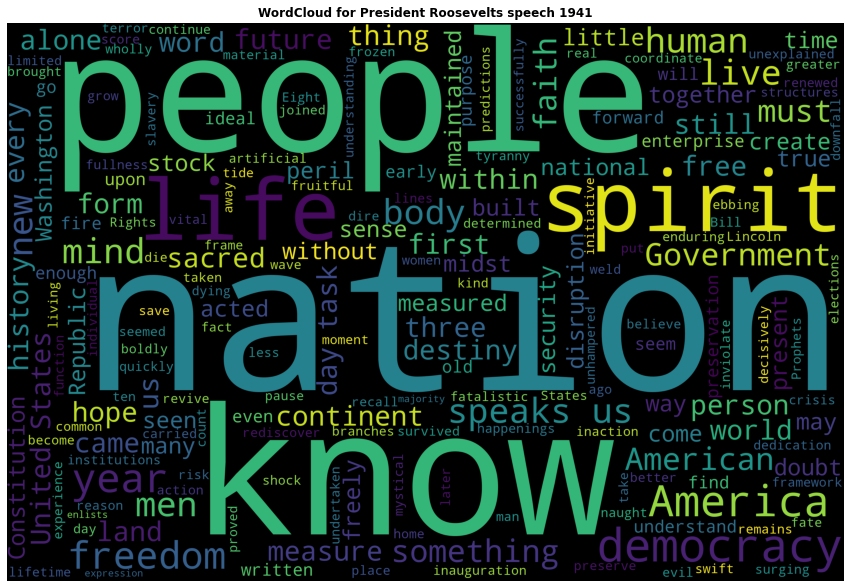

In [95]:
# Making wordcloud for President's Roosevelt speech 1941.

from wordcloud import WordCloud
words_roosevelt = ' '.join(df_roosevelt['Roosevelt'])
cleaned_word_roosevelt = " ".join([word for word in words_roosevelt.split()
                            if word not in stopwords
                            ])
wordcloud_roosevelt = WordCloud(
                      background_color='black',
                      width=3000,
                      height=2000
                     ).generate(cleaned_word_roosevelt)
plt.figure(1,figsize=(15,12))
plt.imshow(wordcloud_roosevelt)
plt.axis('off')
plt.title('WordCloud for President Roosevelts speech 1941')
plt.show()

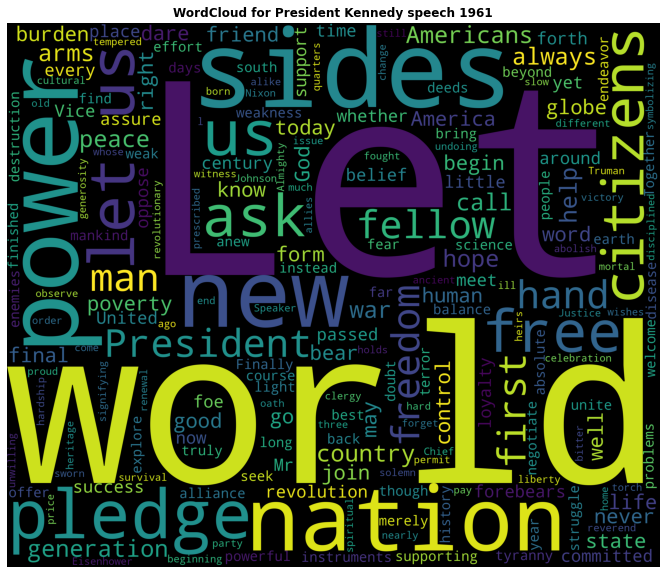

In [96]:
# Making wordcloud for President's Kennedy speech 1961.

from wordcloud import WordCloud
words_kennedy = ' '.join(df_kennedy['Kennedy'])
cleaned_word_kennedy = " ".join([word for word in words_kennedy.split()
                            if word not in stopwords
                            ])
wordcloud_kennedy = WordCloud(
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word_kennedy)
plt.figure(1,figsize=(12,10))
plt.imshow(wordcloud_kennedy)
plt.axis('off')
plt.title('WordCloud for President Kennedy speech 1961')
plt.show()


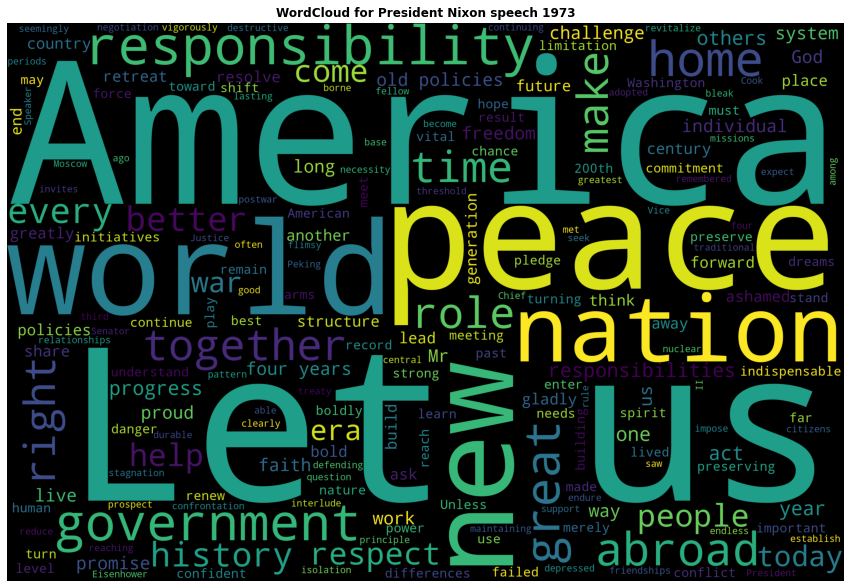

In [97]:
# Making wordcloud for President's Nixon speech 1973.

from wordcloud import WordCloud
words_nixon = ' '.join(df_nixon['Nixon'])
cleaned_word_nixon = " ".join([word for word in words_nixon.split()
                            if word not in stopwords
                            ])
wordcloud_nixon = WordCloud(
                      background_color='black',
                      width=3000,
                      height=2000
                     ).generate(cleaned_word_nixon)
plt.figure(1,figsize=(15,12))
plt.imshow(wordcloud_nixon)
plt.axis('off')
plt.title('WordCloud for President Nixon speech 1973')
plt.show()